# Dynamic Programming

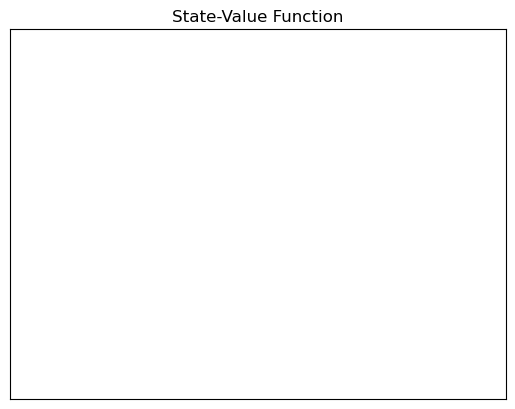

In [2]:
import numpy as np
from pprint import pprint
from frozenlake import FrozenLakeEnv
from plot_utils import plot_values

In [3]:
env = FrozenLakeEnv()

In [4]:
print(env.desc)

[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]


In [5]:
print(env.observation_space)
print(env.action_space)

print(env.nS)
print(env.nA)

Discrete(16)
Discrete(4)
16
4


In [6]:
state = 1
action = 0
possible = env.P[state][action]

In [7]:
pprint(possible)

[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]


In [7]:
state = 1
action = 1
possible = env.P[state][action]

In [8]:
pprint(possible)

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True),
 (0.3333333333333333, 2, 0.0, False)]


### Problem 1: Iterative Policy Evaluation

In [8]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    # TODO
    delta = theta
    while not (delta < theta):
        delta = 0
        for state in reversed(range(env.nS)):
            v = V[state]
            val = 0
            for action in range(env.nA):
                for possible in env.P[state][action]:
                    val += policy[state,action] * possible[0] * (possible[2]+gamma*V[possible[1]])
            
            V[state] = val
            delta = max(delta, abs(v-V[state]))
    return V

In [9]:
random_policy = np.ones([env.nS, env.nA]) / env.nA

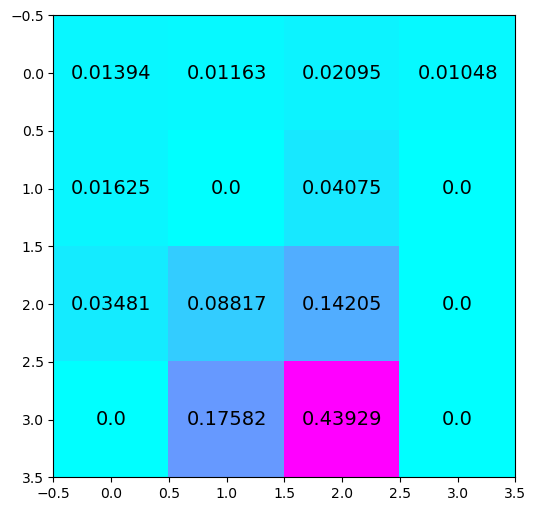

In [10]:
# evaluate the policy 
V = policy_evaluation(env, random_policy)

plot_values(V)

### Problem 2: Obtain $q_\pi$ from $v_\pi$

In [11]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    # TODO
    
    return q

In [12]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Problem 3: Policy Improvement

In [13]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA])
    # TODO
        
    return policy

### Problem 4: Policy Iteration

In [14]:
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    # TODO
    return policy, V

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]] 



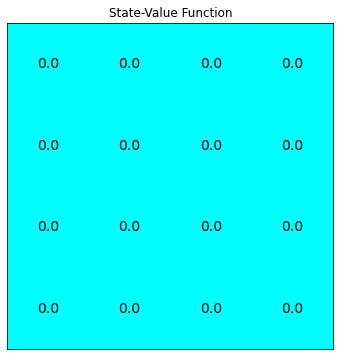

In [15]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)
print(policy_pi,"\n")

plot_values(V_pi)

### Problem 5: Value Iteration

In [16]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    # TODO
    policy = policy_improvement(env, V, gamma)
    return policy, V

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 



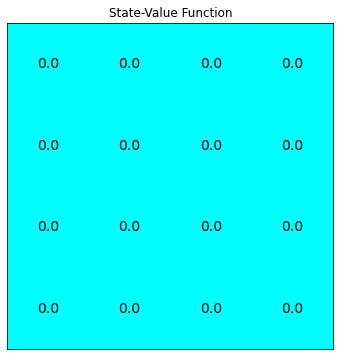

In [17]:
policy_vi, V_vi = value_iteration(env)
print(policy_vi,"\n")

plot_values(V_vi)